In [1]:
import copy

import networkx as nx

from regraph.hierarchy import Hierarchy
from regraph.rules import Rule
from regraph.plotting import plot_graph, plot_instance, plot_rule
from regraph.primitives import find_matching, rewrite, print_graph, equal, add_nodes_from,  add_edges_from
from regraph.utils import keys_by_value

import matplotlib.pyplot as plt

In [2]:
hierarchy = Hierarchy()

graph = nx.DiGraph()
add_nodes_from(graph,
    [
        ('1', {'name': 'EGFR', 'state': 'p'}),
        ('2', {'name': 'BND'}),
        ('3', {'name': 'Grb2', 'aa': 'S', 'loc': 90}),
        ('4', {'name': 'SH2'}),
        ('5', {'name': 'EGFR'}),
        ('6', {'name': 'BND'}),
        ('7', {'name': 'Grb2'}),
        ('8', {'name': 'WAF1'}),
        ('9', {'name': 'BND'}),
        ('10', {'name': 'G1-S/CDK', 'state': 'p'}),
])
edges = [
    ('1', '2', {'s': 'p'}),
    ('4', '2', {'s': 'u'}),
    ('4', '3'),
    ('5', '6', {'s': 'p'}),
    ('7', '6', {'s': 'u'}),
    ('8', '9'),
    ('9', '8'),
    ('10', '8', {"a": {1}}),
    ('10', '9', {"a": {2}}),
    ('5', '2', {'s': 'u'})
]

add_edges_from(graph, edges)

hierarchy.add_graph("g", graph)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


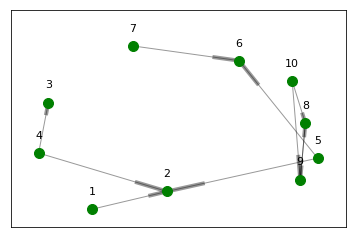

In [3]:
positioning = plot_graph(graph)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


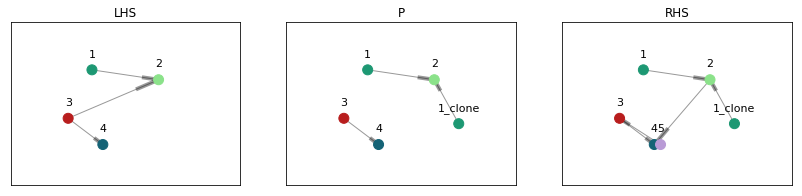

In [4]:
pattern = nx.DiGraph()
add_nodes_from(
    pattern,
    [(1, {'state': 'p'}),
     (2, {'name': 'BND'}),
     3,
     4]
)
add_edges_from(
    pattern,
    [(1, 2, {'s': 'p'}),
     (3, 2, {'s': 'u'}),
     (3, 4)]
)

p = nx.DiGraph()
add_nodes_from(p,
    [(1, {'state': 'p'}),
    '1_clone',
    (2, {'name': 'BND'}),
    3,
    4
])
add_edges_from(
    p,
    [(1, 2),
    ('1_clone', 2),
    (3, 4)
])

rhs = nx.DiGraph()
add_nodes_from(
    rhs,
    [(1, {'state': 'p'}),
    '1_clone',
    (2, {'name': 'BND'}),
    3,
    4,
    5
])

add_edges_from(
    rhs,
    [(1, 2, {'s': 'u'}),
    ('1_clone', 2),
    (2, 4),
    (3, 4),
    (5, 3)
])

p_lhs = {1: 1, '1_clone': 1, 2: 2, 3: 3, 4: 4}
p_rhs = {1: 1, '1_clone': '1_clone', 2: 2, 3: 3, 4: 4}

rule = Rule(p, pattern, rhs, p_lhs, p_rhs)
plot_rule(rule)

In [5]:
instances = hierarchy.find_matching("g", rule.lhs)
print(instances)

[{1: '1', 2: '2', 3: '4', 4: '3'}, {1: '1', 2: '2', 3: '5', 4: '6'}]


In [6]:
hierarchy.rewrite("g", rule, instances[0])

(None, None)

In [7]:
hierarchy.node["g"].graph.nodes()

['1', '11', '2', '4', '3', 5, '5', '6', '7', '8', '9', '10']

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


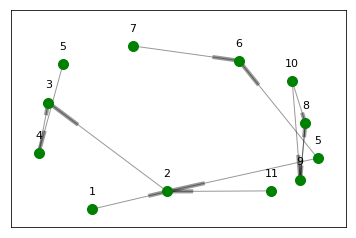

{'1': array([ 0.19201377,  0.        ]),
 '2': array([ 0.46055417,  0.09878805]),
 '3': array([ 0.03498492,  0.59460668]),
 '4': array([ 0.        ,  0.31313095]),
 '5': array([ 1.        ,  0.28457376]),
 '6': array([ 0.71838769,  0.82824873]),
 '7': array([ 0.33765585,  0.91055074]),
 '8': array([ 0.95622511,  0.47983492]),
 '9': array([ 0.93774736,  0.16551214]),
 '10': array([ 0.90890468,  0.71487772]),
 '11': array([ 0.83449389,  0.10204723]),
 5: array([ 0.08725425,  0.80800425])}

In [8]:
plot_graph(hierarchy.node["g"].graph, parent_pos=positioning)